# Proyecto Primer módulo 

## Problema programación lineal


Un inversionista dispone de $\$100,000$ MXN y quiere sacar el máximo provecho de un portafolio de inversiones conservador. Este se divide en 4 tipos de activos; Cetes, Bonos del gobierno, Pagarés y ETF's todos y cada uno de los activos tienen una tasa de renta fija debido al estilo de portafolio el cual es conservador. El portafolio se divide en 3; activos con tasa libre de riesgo (60%), activos bajo riesgo (30%) y activos bajo-medio riesgo (10%) activos  activos con tasas libres de riesgo (Cetes 9.8%, Bonos gubernamentales 10.14% y Bonos del tesoro 3.05%), activos de bajo riesgo; Pagarés bancarios (pagaré inbursa 9.7%, pagaré BAM 9.30%, pagaré Multiva 8.02% y pagaré Banorte 4.44%) y activos de riesgo bajo-medio; ETF'S (Short-Term Treasury ETF 0.04%, ESG U.S. Corporate Bond ETF 0.12%, Extended Duration Treasury ETF 0.06). Para cada activo máximo se puede invertir un 25% de capital de que se dispone y el activo ETF no puede superar .05% del capital total por temas del riesgo.

**Libre de riesgo 60%**
- Cetes 9.8%
- Bonos gubernamentales 10.14%
- Bonos del tesoro EUA 3.05% 
**Riesgo bajo 30%**
- Pagaré Inbursa 9.75%           20%
- Pagaré BAM 9.30\%
- Pagaré Multiva 8.02\%
- Pagaré Banorte 4.44\%
**Riesgo bajo-medio 10%**
- Short-Term Treasury ETF 0.04\%           20%
    - ESG U.S. Corporate Bond ETF 0.12\%
    - Extended Duration Treasury ETF 0.06\%



In [545]:
import numpy as np 
import scipy.optimize as opt

In [706]:
# Matrices y cotas
c = -np.array([9.8,10.14,3.05,9.75,9.30,8.02,4.44,0.04,0.12,0.06])/100

# Restricciones de desigualdad
A = np.array([[1,1,1,0,0,0,0,0,0,0],
             [0,0,0,1,1,1,1,0,0,0],
             [0,0,0,0,0,0,0,1,1,1]])

b = np.array([0.60*100000,.30*100000,.10*100000])

# Restricción de igualdad
A_eq = np.array([[1,1,1,1,1,1,1,1,1,1]])
b_eq = ([100000])

#Límites (bounds)
bounds = (0,100000*.25)

In [707]:
# Resolver
sol_portafolio = opt.linprog(c,A,b,A_eq,b_eq,bounds,method='revised simplex')

In [708]:
sol_portafolio

     con: array([0.])
     fun: -8204.5
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([0., 0., 0.])
  status: 0
 success: True
       x: array([25000., 25000., 10000., 25000.,  5000.,     0.,     0.,     0.,
       10000.,     0.])

## Para maximizar la utilidad del portafolio se deberá invertir:
- $\$25,000$ en Cetes
- $\$25,000$ en Bonos del gobierno
- $\$10,000$ en Bonos del tesoro 
- $\$25,000$ en Pagarés inbursa
- $\$5,000$ en Pagarés BAM
- $\$10,000$ en ESG U.S. Corporate Bond ETF 0.12%

In [650]:
utilidad = 25000*(9.8/100)+25000*(10.14/100)+10000*(3.05/100)+25000*(9.75/100)+5000*(9.30/100)+10000*(.12/100)
utilidad

8204.5

El portafolio tendría una utilidad anual de **$\$8204.5$** MXN

## Problema ajuste de curvas

In [710]:
import pandas as pd


In [711]:
archivo = 'fibras.MTY.csv'
data = pd.read_csv(archivo)
data


,Fecha,Número de día,Precio Fibras MTY stock
0,25.07.2022,1,11.924
1,26.07.2022,2,12.003
2,27.07.2022,3,11.934
3,28.07.2022,4,11.924
4,29.07.2022,5,11.924
5,01.08.2022,6,11.924
6,02.08.2022,7,11.934
7,03.08.2022,8,11.944
8,04.08.2022,9,11.973
9,05.08.2022,10,11.973


In [712]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [713]:
x = data.iloc[:,1]
y = data.iloc[:,2]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

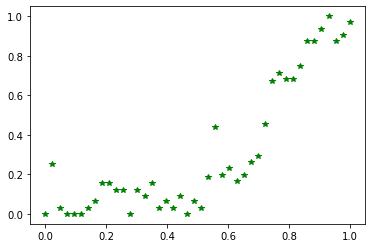

In [717]:
plt.plot(x_norm, y_norm, '*g')

In [554]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [555]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

#Ajusta polinomio de grado 4
b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))


In [556]:
ajuste1

      fun: 1.3004990597312813
 hess_inv: array([[ 0.24234713, -0.42701716],
       [-0.42701716,  0.79029112]])
      jac: array([6.25848770e-07, 1.34110451e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.16638857,  0.96827771])

In [557]:
ajuste2

      fun: 0.44479757835030576
 hess_inv: array([[ 0.0935112 , -0.36966403,  0.30451251],
       [-0.36966403,  2.00087989, -1.87057686],
       [ 0.30451251, -1.87057686,  1.87057686]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 0.1248799 , -0.82094295,  1.78922068])

In [558]:
ajuste3

      fun: 0.44457899482649105
 hess_inv: array([[  0.15204961,  -1.11780308,   2.19971226,  -1.2647823 ],
       [ -1.11780308,  11.55909738, -26.07952438,  16.15441631],
       [  2.19971226, -26.07952438,  63.18151099, -40.91009489],
       [ -1.2647823 ,  16.15441631, -40.91009489,  27.2966261 ]])
      jac: array([ 8.94069672e-08, -4.02331352e-07,  4.95463610e-07, -1.15483999e-07])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([ 0.11973707, -0.75543393,  1.62354885,  0.11044902])

In [559]:
ajuste4

      fun: 0.3300673642921815
 hess_inv: array([[ 2.08691388e-01, -2.51272043e+00,  8.84848336e+00,
        -1.18254794e+01,  5.31565449e+00],
       [-2.51272043e+00,  4.34034082e+01, -1.74610772e+02,
         2.50092513e+02, -1.17324902e+02],
       [ 8.84848336e+00, -1.74610772e+02,  7.51001316e+02,
        -1.12075684e+03,  5.40681355e+02],
       [-1.18254794e+01,  2.50092513e+02, -1.12075684e+03,
         1.71985885e+03, -8.46672335e+02],
       [ 5.31565449e+00, -1.17324902e+02,  5.40681355e+02,
        -8.46672335e+02,  4.23274134e+02]])
      jac: array([-7.41332769e-07,  2.04518437e-06,  7.89761543e-07, -8.23289156e-07,
       -1.89989805e-06])
  message: 'Optimization terminated successfully.'
     nfev: 180
      nit: 27
     njev: 30
   status: 0
  success: True
        x: array([-2.14721638e-03,  1.96397422e+00, -1.09439824e+01,  1.98066875e+01,
       -9.84811409e+00])

In [560]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)

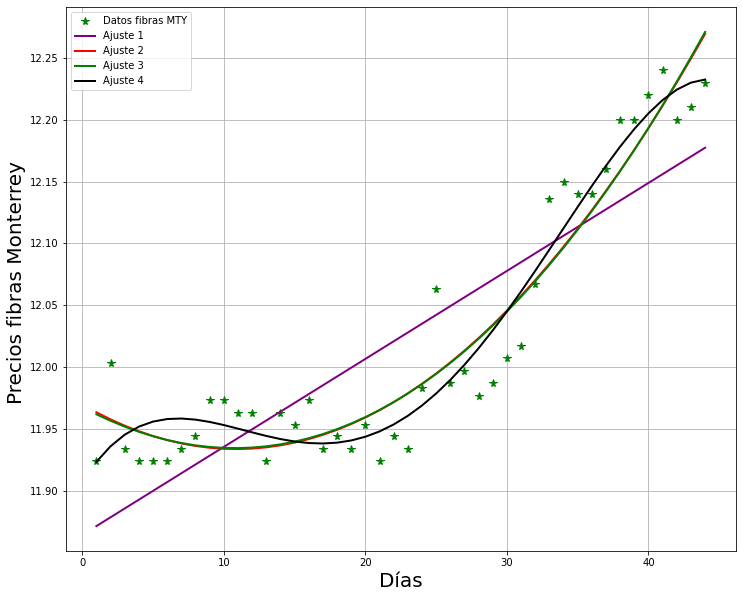

In [719]:
plt.figure(figsize=(12,10))

plt.plot(x, y, 'g*', ms=8, label='Datos fibras MTY')
plt.plot(x, yhat1, color = "purple", lw=2, label='Ajuste polinomio 1')
plt.plot(x, yhat2, color = "red", lw=2, label='Ajuste polinomio 2')
plt.plot(x, yhat3, color = "green", lw=2, label='Ajuste polinomio 3')
plt.plot(x, yhat4, color = "black", lw=2, label='Ajuste polinomio 4')

plt.xlabel('Días',fontsize=20)
plt.ylabel('Precios fibras Monterrey ',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

[]

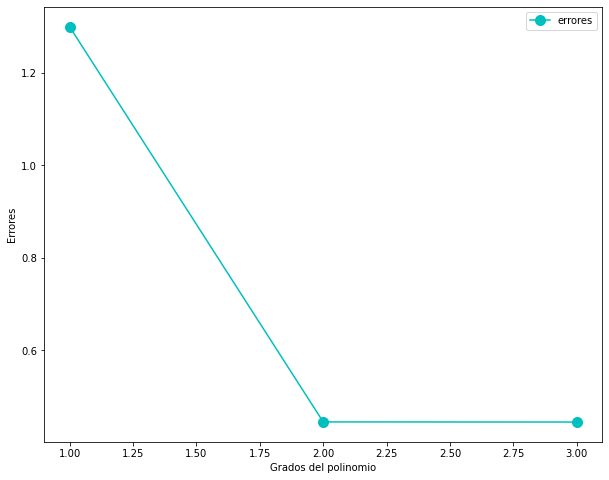

In [562]:
e = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
grados = [1, 2, 3]
plt.figure(figsize=(10,8))
plt.plot(grados, e, 'oc-', ms=10, label='errores')
plt.legend()
plt.xlabel('Grados del polinomio', fontsize=10)
plt.ylabel('Errores', fontsize=10)
plt.plot()

Utilizaremos el polinomio de grado 5 es el más indicado para hacer predicciones y se aproxima a los puntos de la gráfica 

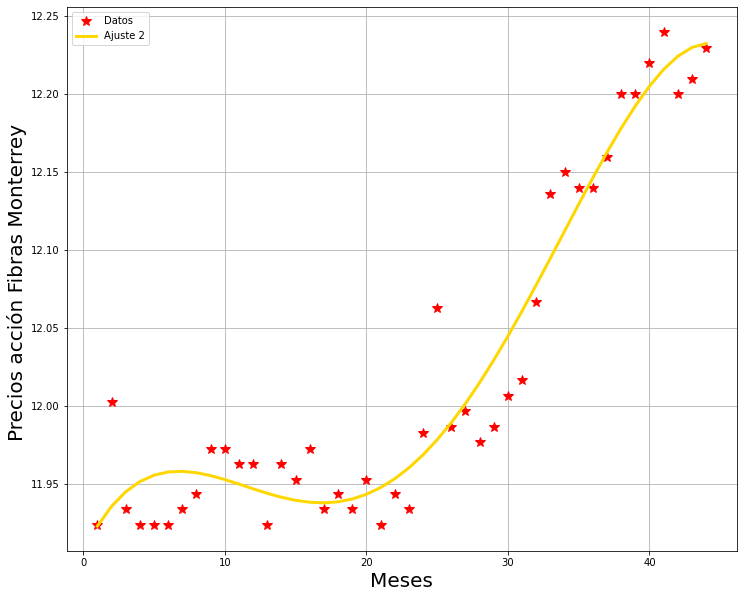

In [563]:
plt.figure(figsize=(12,10))

plt.plot(x, y, 'r*', ms=10, label='Datos')

plt.plot(x, yhat4, color = "gold", lw=3, label='Ajuste 2')

plt.xlabel('Meses',fontsize=20)
plt.ylabel('Precios acción Fibras Monterrey ',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

In [564]:
yhat1[43],yhat2[43],yhat3[43], y[43]



(12.17739696828857, 12.269437810196042, 12.271063120490556, 12.23)

In [565]:
grado1 = yhat1[43]-y[43]
grado1



-0.052603031711431214

In [566]:
grado2 = -yhat2[43]+y[43]
grado2

-0.03943781019604131

In [567]:
grado3 = -yhat3[43]+y[43]
grado3

-0.041063120490555605